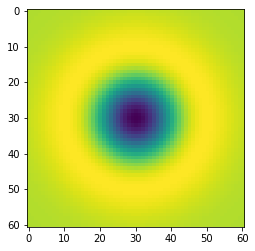

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

sigma =10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) +Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))

plt.imshow(log)

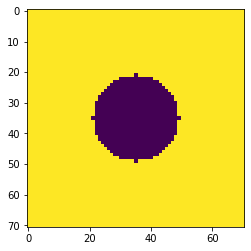

In [21]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

w,h = 71,71
hw = w//2
hh = h//2


f= np.ones((h,w),dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))

r = w//5
f*= X**2+Y**2 > r**2
plt.imshow(f)

(35, 35, 5)
10


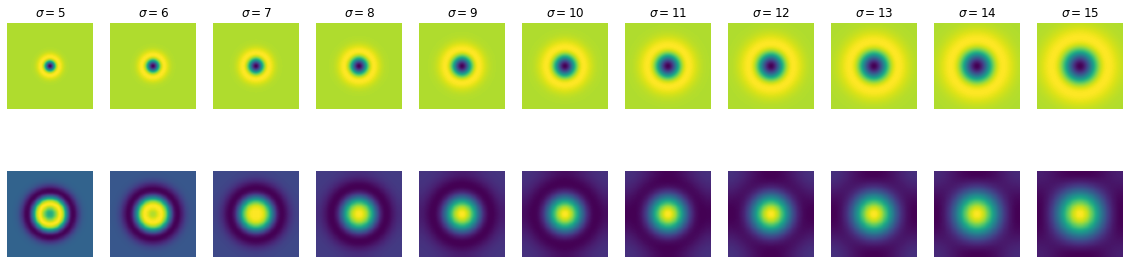

In [22]:
s = 11
fig, ax=plt.subplots(2,s,figsize=(20,5))
scale_space = np.empty((h,w,s),dtype=np.float32)
sigmas = np.arange(5,16,1)
for i,sigma in enumerate(np.arange(5,16,1)):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw,log_hw+1,1),np.arange(-log_hw,log_hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) +Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i]=f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')
  

indices = np.unravel_index(np.argmax(scale_space,axis=None),scale_space.shape)
print(indices)
print(sigmas[indices[2]])
    